# Análise de Estatísticas das Top 5 Ligas de Futebol Europeias
# Autor: Gabriel Menegueli

In [2]:
# ## Importando as bibliotecas necessárias
import pandas as pd
# https://pandas.pydata.org/docs/

import matplotlib.pyplot as plt
# https://matplotlib.org/stable/users/index.html

import seaborn as sns
# https://seaborn.pydata.org/tutorial/introduction

In [3]:
# Configurando estilo dos gráficos
sns.set(style="darkgrid")

### Carregando os Dados

In [5]:
file_path = r'./data/top5-players.csv'

# Carregando o dataset
data = pd.read_csv(file_path)

# Visualizando as primeiras linhas do dataset
data.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,23.0,2000.0,20,13,...,0.00,0.07,0.07,0.00,0.07,0.00,0.06,0.06,0.00,0.06
1,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,22.0,2000.0,30,14,...,0.14,0.14,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27
2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,19.0,2003.0,7,1,...,0.00,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19
3,4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,17.0,2006.0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,5,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,35.0,1987.0,31,31,...,0.13,0.00,0.13,0.10,0.10,0.11,0.01,0.12,0.09,0.09


### Análise 1: Distribuição de Idades dos Jogadores

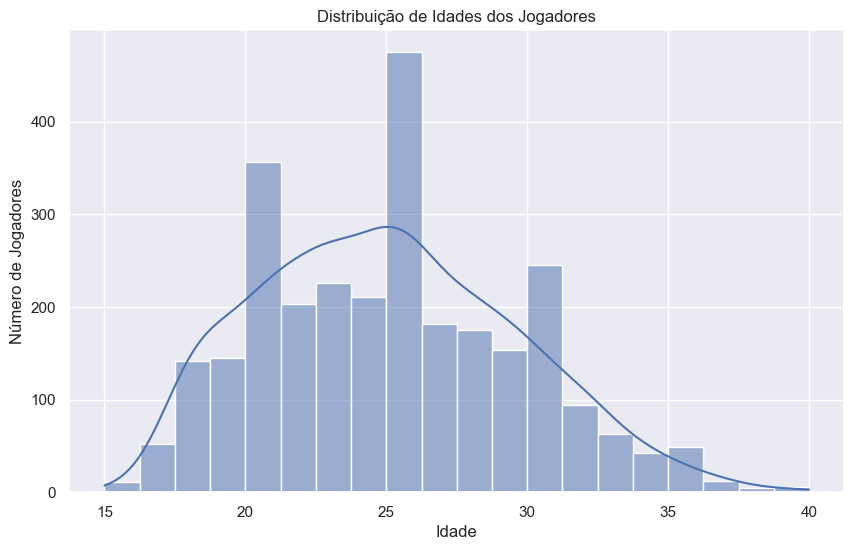

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, bins=20)
plt.title('Distribuição de Idades dos Jogadores')
plt.xlabel('Idade')
plt.ylabel('Número de Jogadores')
plt.show()

### Análise 2: Comparação de Gols Marcados por Posição

#### Tradução das Posições:

- **FW**: Atacante (Forward)
- **MF**: Meio-campista (Midfielder)
- **DF**: Defensor (Defender)
- **GK**: Goleiro (Goalkeeper)


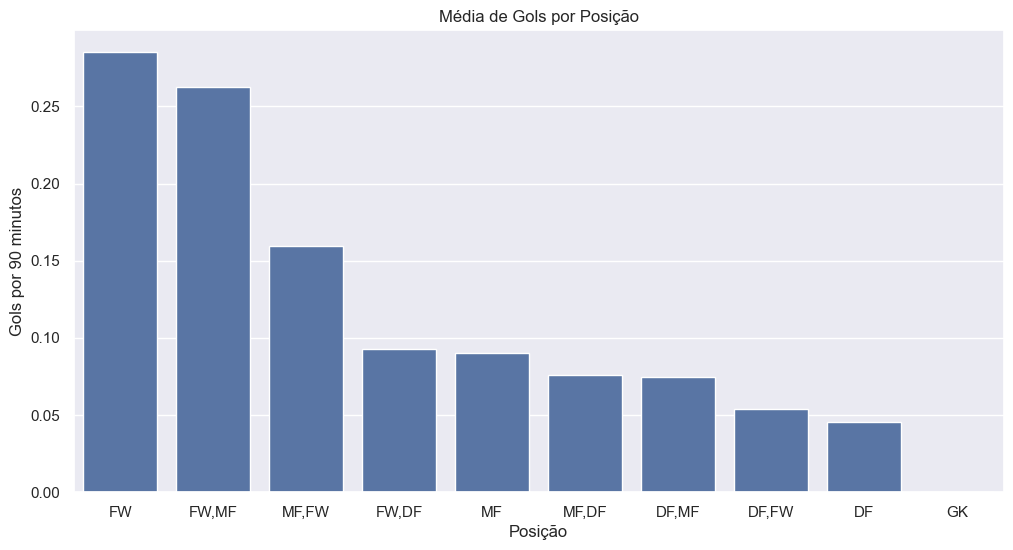

In [14]:
avg_goals_by_position = data.groupby('Pos')['Gls_90'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_goals_by_position.index, y=avg_goals_by_position.values)
plt.title('Média de Gols por Posição')
plt.xlabel('Posição')
plt.ylabel('Gols por 90 minutos')
plt.show()

### Análise 3: Melhores Marcadores e Assistentes
#### Tradução das Colunas:

- **Player**: Jogador
- **Squad**: Time
- **Comp**: Liga

In [25]:
# Top 10 Marcadores por 90 minutos
top_scorers = data.sort_values(by='Gls_90', ascending=False).head(10)
print("Top 10 Marcadores por 90 minutos:")
print(top_scorers[['Player', 'Squad', 'Comp', 'Gls_90']])

# Top 10 Assistentes por 90 minutos
top_assist = data.sort_values(by='Ast_90', ascending=False).head(10)
print("\nTop 10 Assistentes por 90 minutos:")
print(top_assist[['Player', 'Squad', 'Comp', 'Ast_90']])

Top 10 Marcadores por 90 minutos:
                     Player         Squad                Comp  Gls_90
682   Federico Di Francesco         Lecce          it Serie A    6.00
2030         Miloš Pantović  Union Berlin       de Bundesliga    6.00
2627           Chaka Traorè         Milan          it Serie A    4.50
1694           Nolan Mbemba      Le Havre          fr Ligue 1    4.09
2369            Zanos Savva        Torino          it Serie A    3.21
788           George Earthy      West Ham  eng Premier League    2.65
1850     Kingstone Mutandwa      Cagliari          it Serie A    2.31
1911           Lukas Nmecha     Wolfsburg       de Bundesliga    2.14
582            Oscar Cortés          Lens          fr Ligue 1    2.05
2683            Alejo Véliz     Tottenham  eng Premier League    1.80

Top 10 Assistentes por 90 minutos:
                     Player            Squad                Comp  Ast_90
409   Rareș-Cătălin Burnete            Lecce          it Serie A   11.25
1397   Christi

### Análise 4: Correlação entre Gols e Assistências

Nesta análise, estamos tentando entender se existe alguma relação entre o número de gols que um jogador marca por 90 minutos e o número de assistências que ele fornece por 90 minutos. A ideia é descobrir se jogadores que tendem a marcar mais gols também tendem a fornecer mais assistências, ou se essas duas métricas não estão relacionadas.

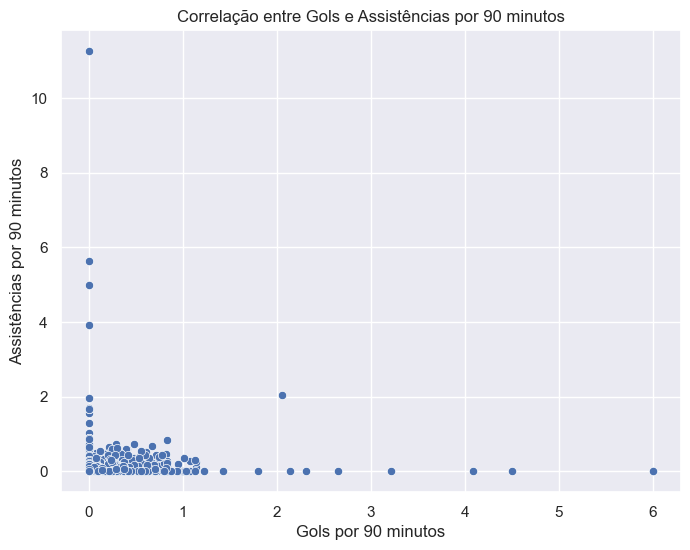

Correlação entre Gols e Assistências: 0.04


In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Gls_90', y='Ast_90', data=data)
plt.title('Correlação entre Gols e Assistências por 90 minutos')
plt.xlabel('Gols por 90 minutos')
plt.ylabel('Assistências por 90 minutos')
plt.show()

# Calculando a correlação
corr = data[['Gls_90', 'Ast_90']].corr()
print(f"Correlação entre Gols e Assistências: {corr.iloc[0, 1]:.2f}")

### Análise 5: Análise de xG (Gols Esperados)

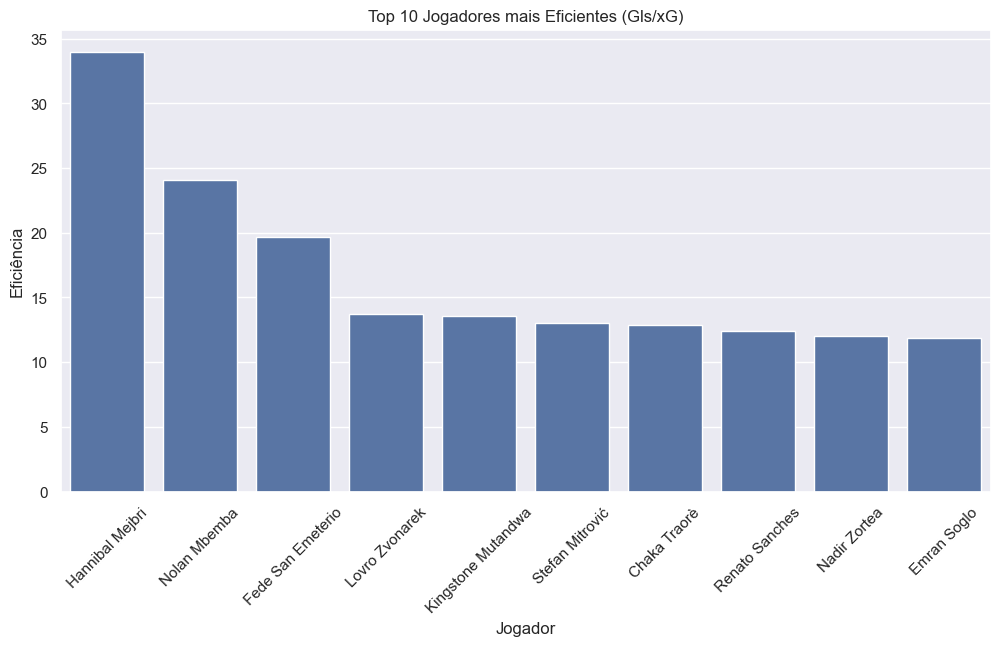

In [36]:
efficiency = data[['Player', 'Gls_90', 'xG_90']].copy()
efficiency['Efficiency'] = efficiency['Gls_90'] / efficiency['xG_90']
efficiency = efficiency.sort_values(by='Efficiency', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Player', y='Efficiency', data=efficiency)
plt.title('Top 10 Jogadores mais Eficientes (Gls/xG)')
plt.xlabel('Jogador')
plt.ylabel('Eficiência')
plt.xticks(rotation=45)
plt.show()

### Análise 6: Distribuição de Jogadores por Nacionalidade

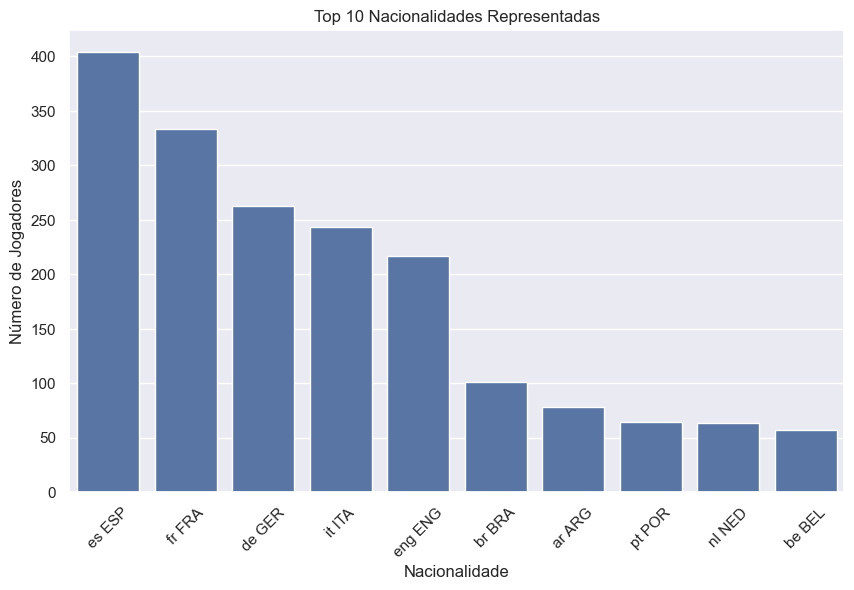

In [39]:
top_nations = data['Nation'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_nations.index, y=top_nations.values)
plt.title('Top 10 Nacionalidades Representadas')
plt.xlabel('Nacionalidade')
plt.ylabel('Número de Jogadores')
plt.xticks(rotation=45)
plt.show()

### Análise 7: Desempenho por Liga

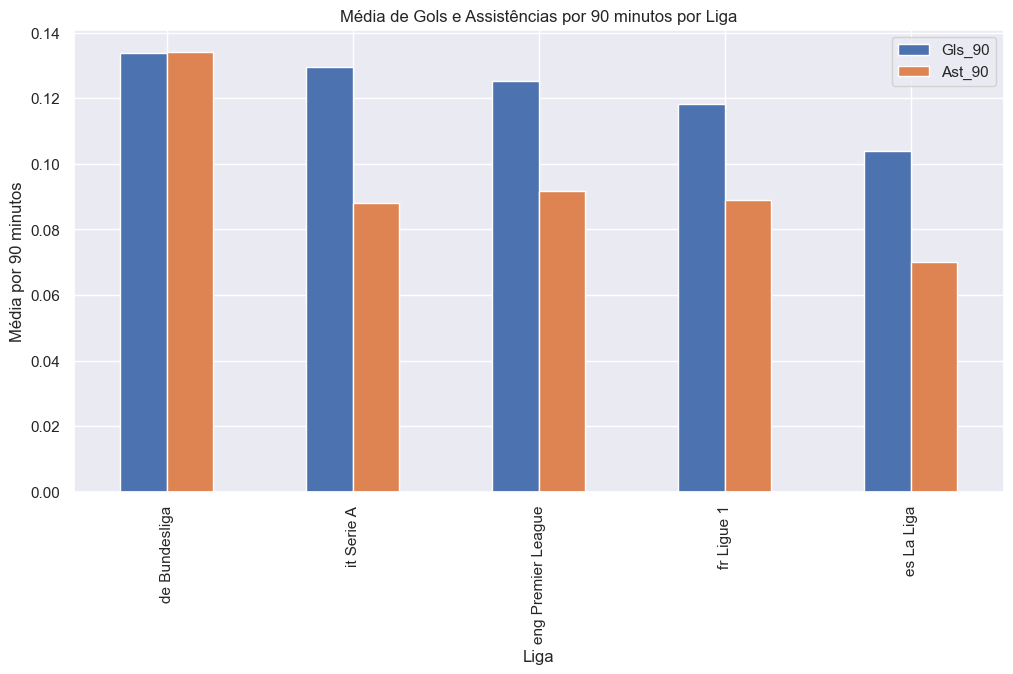

In [44]:
league_performance = data.groupby('Comp')[['Gls_90', 'Ast_90']].mean().sort_values(by='Gls_90', ascending=False)

league_performance.plot(kind='bar', figsize=(12, 6))
plt.title('Média de Gols e Assistências por 90 minutos por Liga')
plt.xlabel('Liga')
plt.ylabel('Média por 90 minutos')
plt.show()